# Prova de Ciência de Dados - Grupo D3

Alunas:

*   Milena Lucas dos Santos
*   Raianny Proença de C. Oliveira
*   Vivian Miwa Fugihara


# 1. Sobre o Dataset

O dataset escolhido é sobre câncer de mama, obtido dos Hospitais da Universidade de Wisconsin, e disponibilizado no link https://www.openml.org/d/15. Os atributos foram computados a partir de uma imagem digitalizada de um fine needle aspirate (FNA) de uma massa mamária. Eles descrevem as características dos núcleos celulares presentes na imagem. 

O conjunto de dados possui 10 atributos (features), sendo um deles a classe (target) do tipo nominal com dois valores: **belign** e **malignant**, que indica se a massa é beligna ou maligna. Há 699 linhas.

Os demais atributos, todos do tipo numérico, são:
*   **Clump thickness** (grossura da massa aglomerada);
*   **Cell size uniformity** (uniformidade do tamanho da célula);
*   **Cell shape uniformity** (uniformidade do formato da célula);
*   **Marginal adhesion** (adesão marginal): As células normais tendem a se unir. As células cancerosas tendem a perder essa capacidade. A perda de adesão é um sinal de malignidade;
*   **Single epi cell size** (tamanho de uma única célula epitelial): Está relacionado com a uniformidade mencionada acima. As células epiteliais que estão significativamente aumentadas podem ser uma célula maligna;
*   **Bare nuclei**: Este é um termo usado para núcleos que não são circundados por citoplasma (o resto da célula). Esses são normalmente vistos em tumores benignos;
*   **Bland chromatin** (cromatina suave): Descreve uma “textura” uniforme do núcleo observada em células benignas. Em células cancerosas, a cromatina tende a ser mais grosseira;
*   **Normal nucleoli** (nucleólos normais): Os nucléolos são pedaços redondos de material genético encontrados em uma parte da célula chamada núcleo. Eles produzem os produtos químicos que as células usam para fazer proteínas.
Os nucléolos grandes são muito comuns em alguns tipos de câncer e os patologistas costumam usá-los como evidência de que uma célula pode ser cancerosa. No entanto, algumas células normais e saudáveis ​​também têm nucléolos grandes, de modo que o contexto em que essas estruturas são vistas é importante para fazer o diagnóstico correto;
*   **Mitoses**: Medida de quão rápido as células cancerosas estão se dividindo e crescendo. Para encontrar a taxa mitótica, é contado o número de células que se dividem em uma certa quantidade de tecido canceroso. A taxa mitótica é usada para ajudar a encontrar o estágio do melanoma (um tipo de câncer de pele) e outros tipos de câncer.



# Implementação

## Imports

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ProvaCD/dataset_breast_cancer.csv')
#dataset = pd.read_csv('dataset_breast_cancer.csv')
dataset

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,benign
695,2,1,1,1,2,1,1,1,1,benign
696,5,10,10,3,7,3,8,10,2,malignant
697,4,8,6,4,3,4,10,6,1,malignant


## Tratamento dos dados

### Convertendo o tipo da classe para int: 0 e 1

In [ ]:
# substituindo beligno por 0 e maligno por 1
new_values = {'benign': 0, 'malignant': 1}
dataset['Class'] = dataset['Class'].map(new_values)
dataset

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


### Substituindo valores desconhecidos representados por "?"

Notamos que o dataset continha valores desconhecidos representados por "?", na coluna "Bare Nuclei". Desse modo, optamos por substituir os valores "?" pela média de todos os valores da coluna.

In [ ]:
dataset['Bare_Nuclei'].head(25)

0      1
1     10
2      2
3      4
4      1
5     10
6     10
7      1
8      1
9      1
10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
23     ?
24     1
Name: Bare_Nuclei, dtype: object

Para isso, foi necessário primeiramente converter o tipo do atributo "object" para float.

In [ ]:
# convertendo object para float
dataset['Bare_Nuclei'] = pd.to_numeric(dataset['Bare_Nuclei'],errors = 'coerce')

In [ ]:
# obtendo a média dos valores da coluna
dataset['Bare_Nuclei'].mean()

3.5446559297218156

In [ ]:
# mostrando apenas as linhas que tem o bare nuclei como desconhecido
dataset[(dataset['Bare_Nuclei'] != 0) & (dataset['Bare_Nuclei'] != 1) & (dataset['Bare_Nuclei'] != 2) & (dataset['Bare_Nuclei'] != 3) & (dataset['Bare_Nuclei'] != 4) &
        (dataset['Bare_Nuclei'] != 5) & (dataset['Bare_Nuclei'] != 6) & (dataset['Bare_Nuclei'] != 7) & (dataset['Bare_Nuclei'] != 8) & (dataset['Bare_Nuclei'] != 9) & (dataset['Bare_Nuclei'] != 10)]

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,8,4,5,1,2,NaN,7,3,1,1
40,6,6,6,9,6,NaN,7,8,1,0
139,1,1,1,1,1,NaN,2,1,1,0
145,1,1,3,1,2,NaN,2,1,1,0
158,1,1,2,1,3,NaN,1,1,1,0
164,5,1,1,1,2,NaN,3,1,1,0
235,3,1,4,1,2,NaN,3,1,1,0
249,3,1,1,1,2,NaN,3,1,1,0
275,3,1,3,1,2,NaN,2,1,1,0
292,8,8,8,1,2,NaN,6,10,1,1


Obs: fizemos a substituição "na mão", pois com a função map não estava dando certo.

In [ ]:
# substituindo "?" pela média
dataset['Bare_Nuclei'][23]=3
dataset['Bare_Nuclei'][40]=3
dataset['Bare_Nuclei'][139]=3
dataset['Bare_Nuclei'][145]=3
dataset['Bare_Nuclei'][158]=3
dataset['Bare_Nuclei'][164]=3
dataset['Bare_Nuclei'][235]=3
dataset['Bare_Nuclei'][249]=3
dataset['Bare_Nuclei'][275]=3
dataset['Bare_Nuclei'][292]=3
dataset['Bare_Nuclei'][294]=3
dataset['Bare_Nuclei'][297]=3
dataset['Bare_Nuclei'][315]=3
dataset['Bare_Nuclei'][321]=3
dataset['Bare_Nuclei'][411]=3
dataset['Bare_Nuclei'][617]=3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

### Convertendo os valores dos atributos para float

In [ ]:
# mostrar tipo dos atributos
dataset.dtypes

Clump_Thickness            int64
Cell_Size_Uniformity       int64
Cell_Shape_Uniformity      int64
Marginal_Adhesion          int64
Single_Epi_Cell_Size       int64
Bare_Nuclei              float64
Bland_Chromatin            int64
Normal_Nucleoli            int64
Mitoses                    int64
Class                      int64
dtype: object

In [ ]:
# convertendo pra float
dataset['Clump_Thickness'] = dataset['Clump_Thickness'].astype(float)
dataset['Cell_Size_Uniformity'] = dataset['Cell_Size_Uniformity'].astype(float)
dataset['Cell_Shape_Uniformity'] = dataset['Cell_Shape_Uniformity'].astype(float)
dataset['Marginal_Adhesion'] = dataset['Marginal_Adhesion'].astype(float)
dataset['Single_Epi_Cell_Size'] = dataset['Single_Epi_Cell_Size'].astype(float)
dataset['Bland_Chromatin'] = dataset['Bland_Chromatin'].astype(float)
dataset['Normal_Nucleoli'] = dataset['Normal_Nucleoli'].astype(float)
dataset['Mitoses'] = dataset['Mitoses'].astype(float)

In [ ]:
dataset.dtypes

Clump_Thickness          float64
Cell_Size_Uniformity     float64
Cell_Shape_Uniformity    float64
Marginal_Adhesion        float64
Single_Epi_Cell_Size     float64
Bare_Nuclei              float64
Bland_Chromatin          float64
Normal_Nucleoli          float64
Mitoses                  float64
Class                      int64
dtype: object

## Normalização

In [ ]:
# dataframe sem a classe
dataframe = pd.DataFrame(dataset.drop(['Class'], axis=1))
dataframe

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


In [ ]:
Xoriginal = pd.DataFrame(dataset.drop(['Class'], axis=1))

# passa para y somente a classe
yoriginal = pd.DataFrame(dataset['Class'])

In [ ]:
Xoriginal_train, Xoriginal_test, yoriginal_train, yoriginal_test = train_test_split(Xoriginal, yoriginal, test_size=0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
df = pd.DataFrame(scaler1.fit_transform(dataframe), columns = dataframe.columns)
df # dataframe normalizado

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.703348,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.796516,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.425585,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.129940,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.703348,-0.179662,-0.611825,-0.343912
...,...,...,...,...,...,...,...,...,...
694,-0.503866,-0.699995,-0.743299,-0.633247,-0.097628,-0.425585,-1.000471,-0.611825,-0.343912
695,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.703348,-1.000471,-0.611825,-0.343912
696,0.206936,2.251526,2.287222,0.067687,1.710106,-0.147822,1.872361,2.337594,0.239570
697,-0.148465,1.595632,0.940324,0.418154,-0.097628,0.129940,2.693171,1.026741,-0.343912


In [ ]:
# concatenando o dataframe normalizado com a classe
df = pd.concat([df, dataset['Class']],axis=1)
df

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.703348,-0.179662,-0.611825,-0.343912,0
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.796516,-0.179662,-0.284112,-0.343912,0
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.425585,-0.179662,-0.611825,-0.343912,0
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.129940,-0.179662,1.354454,-0.343912,0
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.703348,-0.179662,-0.611825,-0.343912,0
...,...,...,...,...,...,...,...,...,...,...
694,-0.503866,-0.699995,-0.743299,-0.633247,-0.097628,-0.425585,-1.000471,-0.611825,-0.343912,0
695,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.703348,-1.000471,-0.611825,-0.343912,0
696,0.206936,2.251526,2.287222,0.067687,1.710106,-0.147822,1.872361,2.337594,0.239570,1
697,-0.148465,1.595632,0.940324,0.418154,-0.097628,0.129940,2.693171,1.026741,-0.343912,1


## Balanceamento

0    458
1    241
Name: Class, dtype: int64


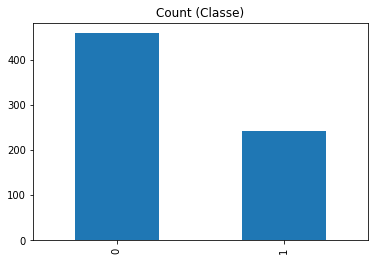

In [ ]:
class_distr = df.Class.value_counts()
print(class_distr)
class_distr.plot(kind='bar', title='Count (Classe)')

Fazendo o balanceamento dos dados já normalizados

In [ ]:
# passa para X somente os atributos preditivos, tirando a classe
# dados normalizados com standard
X = pd.DataFrame(df.drop(['Class'], axis=1))

# passa para y somente a classe
y = pd.DataFrame(df['Class'])

In [ ]:
# smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

#Avaliar a acuracia do SMOTE
model = KNeighborsClassifier(n_neighbors=3,weights='distance', metric='euclidean')
scores = cross_val_score(model,X_sm, y_sm, cv = 10, scoring = 'accuracy')
print("Accuracy: %.2f%%" % (scores.mean() * 100.0))

Accuracy: 98.37%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#transforma em dataframe
Xcc = pd.DataFrame(X_sm, columns= X.columns)
y_classe = pd.DataFrame(y_sm,columns= ['Class'])

In [ ]:
# concatena com a classe
df_cc = pd.concat([Xcc, y_classe],axis=1)

In [ ]:
# fazendo split de teste e treino
Xcc_train, Xcc_test, ycc_train, ycc_test = train_test_split(Xcc, y_classe, test_size=0.1,random_state=42)

## Extração de atributos (PCA)

Optamos por escolher a extração de atributos como método de redução de dimensionalidade, pois acreditamos que a seleção de atributos não seria tão adequada porque o dataset possui poucos atributos, os quais serão úteis e suficientes para trabalharmos.

In [ ]:
pca = PCA(n_components=3) # número de componentes
pca_fit = pca.fit(Xcc)
pca_fit.explained_variance_ratio_ # informação para fazer o scree plot

array([0.63414821, 0.09971608, 0.05979921])

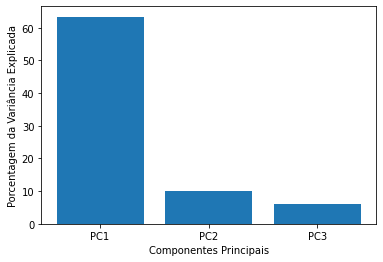

In [ ]:
per_var = np.round(pca_fit.explained_variance_ratio_*100, decimals=1) # transformando para %

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=['PC1','PC2','PC3'])
plt.ylabel('Porcentagem da Variância Explicada')
plt.xlabel('Componentes Principais')
plt.show()

In [ ]:
principalComp = pca.fit_transform(Xcc) 
principalComp # é o novo dataset

array([[-2.17140587,  0.02695362, -0.50767953],
       [ 0.74712795, -0.50224081,  0.11889705],
       [-2.28536479,  0.01611874,  0.03826931],
       ...,
       [ 1.51044119, -0.84493964, -0.33206963],
       [ 3.9042624 , -0.30866568,  0.09768408],
       [ 3.8468375 , -1.89134124,  0.09947756]])

In [ ]:
df_pca = pd.DataFrame(data=principalComp, columns=['PC1', 'PC2', 'PC3']) # é o novo dataframe 
df_pca = pd.concat([df_pca, y_classe], axis=1) # juntando com a classe
df_pca

,PC1,PC2,PC3,Class
0,-2.171406,0.026954,-0.507680,0
1,0.747128,-0.502241,0.118897,0
2,-2.285365,0.016119,0.038269,0
3,0.773419,-0.503649,-0.697091,0
4,-2.036194,0.009794,0.158771,0
...,...,...,...,...
911,3.594077,0.545873,0.117802,1
912,0.731869,-0.728767,-1.821597,1
913,1.510441,-0.844940,-0.332070,1
914,3.904262,-0.308666,0.097684,1


In [ ]:
# fazendo split de teste e treino com o novo dataframe
Xpca = df_pca.drop(['Class'], axis = 1) 
ypca = df_pca['Class']

In [ ]:
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(Xpca, ypca, test_size=0.2)

# 2. Classificadores

## 2.1 Classificador default

In [ ]:
# KNN com k = 3 e métrica euclidiana

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3, metric='euclidean') 
model.fit(Xoriginal_train, yoriginal_train)
y_pred = model.predict(Xoriginal_test)

acc = accuracy_score(yoriginal_test, y_pred)
print(acc)

0.9571428571428572


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


*   KNN sem normalização: acurácia de 95%



## 2.2 Classificador melhorado 

#### 2.2.1 Encontrando o melhor valor de K.

observação para apagar - x e y usados vem do df normalizado


In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import imblearn

Função para encontrar o melhor valor de K.

In [ ]:
# regressão linear
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ('model',KNeighborsClassifier())
    ]
)

# grid search
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,79,81]},
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=3
)

In [ ]:
search.fit(Xpca, ypca)

search.best_score_

search.best_params_
# resultado: k = 9
#k = 3

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 out of 195 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    1.9s finished


{'selector__k': 3}

#### 2.2.2 Encontrando a melhor métrica

In [ ]:
knn = KNeighborsClassifier()
knn.fit(Xpca_train, ypca_train)

print('Train Score', knn.score(Xpca_train, ypca_train))
print('Test Score', knn.score(Xpca_test, ypca_test))

Train Score 0.98224043715847
Test Score 0.9728260869565217


Usando Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    #'n_neighbors': [3,5,11,19,21,23,27,29,31,33,35,37,39,41,53,55,59,61,63,65]
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(n_neighbors=3),
    grid_params,
    verbose = 1,
    cv = 5,
    n_jobs = -1
)
gs_results = gs.fit(Xpca_train, ypca_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [ ]:
gs_results.best_score_
gs_results.best_estimator_
gs_results.best_params_
#{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} -> standadrd
#{'metric': 'manhattan', 'weights': 'uniform'} - > pca

{'metric': 'manhattan', 'weights': 'distance'}

# 3. Análise comparativa entre os classificadores

Através de testes, foi constatado que o desempenho dos classficadores melhoraram, mesmo que pouco, ao aplicar a normalização e o balanceamento.

Agora, vamos verificar se aplicando o PCA melhora a acurácia do knn ou piora.

Acurácia do KNN melhorado, sem o PCA (nos dados normalizados e balanceados)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan') #
scores = cross_val_score(model, Xcc, y_classe, cv = 10, scoring = 'accuracy')
scores

array([0.94565217, 1.        , 0.9673913 , 0.93478261, 0.98913043,
       0.97826087, 1.        , 1.        , 0.98901099, 1.        ])

In [ ]:
print("Accuracy: %.2f%%" % (scores.mean() * 100.0))

Accuracy: 98.04%


Acurácia do KNN melhorado utilizando PCA (nos dados normalizados e balanceados)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
scorespca = cross_val_score(model, Xpca, ypca, cv = 10, scoring = 'accuracy')
scorespca

array([0.94565217, 0.98913043, 0.9673913 , 0.94565217, 0.98913043,
       0.98913043, 1.        , 1.        , 0.98901099, 0.97802198])

In [ ]:
print("Accuracy: %.2f%%" % (scorespca.mean() * 100.0))

Accuracy: 97.93%


Pode-se observar que a utilização do PCA piorou a acurácia, mesmo que pouco. Desse modo, optamos por não utilizá-lo nos testes de hipótese pra ver qual knn (padrão ou melhorado) é melhor.

## Hipótese nula e Métodos estatísticos

H0 -> usar o knn melhorado não altera a acurácia em relação ao knn padrão

H1 -> usar o knn melhorado melhora a acurácia em relação ao knn padrão

Acurácia Knn Default = 95,71%

Acurácia Knn Melhorado = 98,04%

In [ ]:
knn_default = 0.9571
knn_melhorado = 0.9804

print(knn_melhorado - knn_default)

0.0233000000000001


Fazendo a diferença entre as acurácias, observa-se que a diferença foi de 2,33%. Isso comprova que a hipótese nula é falsa, pois ela diz que usar o knn melhorado não altera a acurácia em relação ao knn padrão, sendo que altera.

Além disso, como a diferença foi de 0.023, percebe-se que o a acurácia do knn melhorado é 2,33% maior que a do knn padrão, confirmando a hipótese alternativa que diz que usar o knn melhorado melhora a acurácia em relação ao knn padrão.